## CLASSIFICATION USING PYTHON

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing training set and classification set(here in after refered as test set)

df = pd.read_csv('/Users/uvini/Desktop/ChurnTrainSet.csv',header=None) #data set given does not have a header, so python will automatically assign a numerica value to identify each attribute
df_test = pd.read_csv('/Users/uvini/Desktop/ChurnTestSet.csv',header=None)

In [3]:
# observe train set
df.head(5)

,0,1,2,3,4
0,43,32,12,2,Churn
1,44,31,15,3,Churn
2,44,32,14,3,Churn
3,44,34,14,3,Churn
4,45,25,14,4,Churn


In [4]:
# observe test set
df_test.head(5)

,0,1,2,3
0,46,36,15,4
1,46,38,11,3
2,49,33,16,2
3,50,34,13,3
4,50,22,36,11


In [5]:
# Insights on train set
df.describe()

,0,1,2,3
count,120.000000,120.000000,120.000000,120.000000
mean,58.233333,32.350000,38.550000,12.975000
std,8.311916,4.074207,17.422023,7.624003
min,43.000000,24.000000,12.000000,2.000000
25%,51.000000,30.000000,17.000000,4.000000
50%,57.000000,32.000000,44.500000,14.000000
75%,64.000000,35.000000,52.000000,19.000000
max,79.000000,46.000000,68.000000,26.000000


# PREPROCESSING

In [6]:
# Size of train set
df.shape

(120, 5)

In [7]:
# Size of train set
df_test.shape

(30, 4)

In [8]:
# Check for data duplications

duplicate = df[df.duplicated(keep = 'last')]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,0,1,2,3,4
15,49,33,16,2,Churn


In [9]:
duplicate = df_test[df_test.duplicated(keep = 'last')]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,0,1,2,3


In [10]:
# delete duplicates
df = df.drop_duplicates()
df_test = df_test.drop_duplicates()

In [11]:
# Size of test set
df.shape

(119, 5)

In [12]:
# Size of train set
df_test.shape

(30, 4)

In [13]:
df.groupby([4]).sum() #note that here 4 refers to the class attribute

,0,1,2,3
4,,,,
Churn,1942,1397,621,137
Maybe,2359,1179,1738,567
NoChurn,2638,1273,2251,851


In [14]:
# Check for null values in train set

df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [15]:
# Check for null values in test set

df_test.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [16]:
# Filering out features
y = df[4]
Z = df.drop(columns=[4])

In [17]:
df_test = pd.DataFrame(df_test.values, columns = Z.columns)

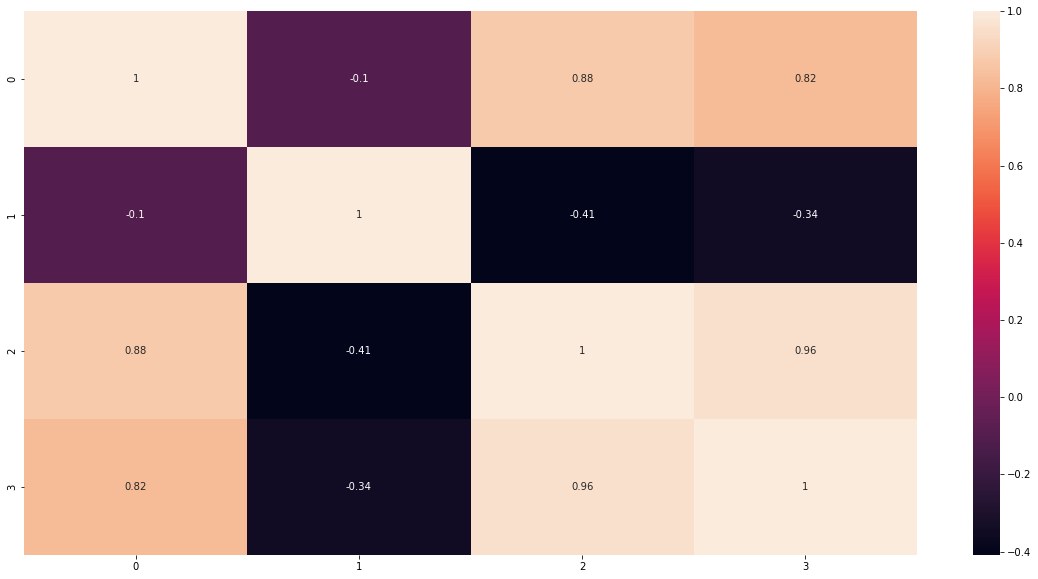

In [18]:
# to get the corealtion matrix

def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

col = list(df.columns)
correlation_df = show_correlations(df[col],show_chart=True)

In [19]:
# remove highly corelated attributes if any from both the data sets

df = df.drop(columns=[3])
df_test = df_test.drop(columns=[3])

# TRAINING

In [20]:
# import necessary libraries to carry out model training 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


# Partitioning data into test and train set
X = df.drop(columns=[4])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forests

In [21]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier() #(n_estimators = 1000, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
train_predict_rf1 = classifier.predict(X_test)

In [22]:
# Model accuracy
train_pred = classifier.predict(X_test)
result = metrics.confusion_matrix(y_test, train_pred)
print("Confusion Matrix:")
print(result)

result1 = metrics.classification_report(y_test, train_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[8 0 0]
 [0 7 1]
 [0 2 6]]
Classification Report:
              precision    recall  f1-score   support

       Churn       1.00      1.00      1.00         8
       Maybe       0.78      0.88      0.82         8
     NoChurn       0.86      0.75      0.80         8

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24



In [23]:
# Print output into a CSV

test_predit = classifier.predict(df_test)
outDF = pd.DataFrame()
outDF['class'] = test_predit
outDF.to_csv('/Users/uvini/Desktop/Predictions.csv', index=False)

### Decision Trees

In [24]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

train_predictions = dt.predict(X_test)
score = dt.score(X_test, y_test) * 100

In [25]:
# Model accuracy

train_pred = dt.predict(X_test)
result = metrics.confusion_matrix(y_test, train_pred)
print("Confusion Matrix:")
print(result)

result1 = metrics.classification_report(y_test, train_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[8 0 0]
 [0 7 1]
 [0 0 8]]
Classification Report:
              precision    recall  f1-score   support

       Churn       1.00      1.00      1.00         8
       Maybe       1.00      0.88      0.93         8
     NoChurn       0.89      1.00      0.94         8

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



In [26]:
# Print output into a CSV

test_predit = dt.predict(df_test)
outDF = pd.DataFrame()
outDF['class'] = test_predit
outDF.to_csv('/Users/uvini/Desktop/Predictions.csv', index=False)

### Gaussian Naive Bayes¶

In [27]:
from sklearn.naive_bayes import GaussianNB
    
nb = GaussianNB()
nb.fit(X_train, y_train)
train_predi= nb.predict(X_test)

In [28]:
# Model accuracy

train_pred = nb.predict(X_test)
result = metrics.confusion_matrix(y_test, train_pred)
print("Confusion Matrix:")
print(result)

result1 = metrics.classification_report(y_test, train_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[8 0 0]
 [0 6 2]
 [0 2 6]]
Classification Report:
              precision    recall  f1-score   support

       Churn       1.00      1.00      1.00         8
       Maybe       0.75      0.75      0.75         8
     NoChurn       0.75      0.75      0.75         8

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



In [29]:
# Print output into a CSV

test_predit = nb.predict(df_test)
outDF = pd.DataFrame()
outDF['Species-class'] = test_predit
outDF.to_csv('/Users/uvini/Desktop/Predictions.csv', index=False)